In [1]:
import os

os.environ['OPENBLAS_NUM_THREADS'] = '20'
os.environ['MKL_NUM_THREADS'] = '20'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as dt
import copy
import statsmodels.api as sm
from matplotlib.colors import LogNorm
import xarray as xr
import pickle
import random
import time
import signal
import multiprocessing
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from scipy import interpolate
import random
import lightgbm as lgb
import itertools
from scipy import spatial
import joblib



def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import sys
sys.path.insert(1,'/home/jsperezc/jupyter/AQ_Forecast/functions/')
import postprocessing
from preprocessing import *

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import RegressorChain, MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit




Últimas actualizaciones:

 14 de marzo de 2023 
1. Se modifica la función meteo al subpaquete airquality.read_data, la cual permite la lectura de datos de las estaciones meteorologicas, se optimizo la consulta de vaisalas por lo que se elimino el argumento vaisala y se agrego el argumento flags para obtener los indices de validación (permite conteos de calidad, dada la reciente necesidad).
    Ej. read.meteo(Fechai='2023-01-01 00:00', Fechaf='2023-03-01 00:00',estaciones=['BAR-PDLA','ITA-CJUS','V-ITA-CONC'],printquery=True, flags=False).data

 20 de abril de 2023 
2. Se modifica la función plot_barras_ICA_anual del subpaquete airquality.plots, se añade argumento de número de días en el año para graficar las barras para algunos meses en el año, para varios años.
    Ej. plots.plot_barras_ICA_anual(var='PM2.5', df=df,n_day=60)

 04 de mayo de 2023 
3. Se agrega la función porcentaje_validados al subpaquete airquality.data_analysis, el cual permite la obtencion del porcentaje de datos va

In [2]:
from trajectories import *

# Compute IFRP (just had to do it once)

In [3]:
# path_bt = '/var/data1/AQ_Forecast_DATA/historic/GFS/validation/Vientos/BT/'

In [4]:
# #################### LECTURA INCENDOS HISTÓRICOS ########################
# import datetime as dt
# df_fires = pd.read_csv('/var/data1/AQ_Forecast_DATA/historic/Fires/fire_archive_M-C61_246192.csv')

# str_time = df_fires['acq_time'].values.astype(str)
# str_time = np.array([str_time[i].zfill(4) for i in range(len(str_time))])
# str_date = df_fires['acq_date'].values.astype(str)

# dates_fires = np.array([dt.datetime.strptime(str_date[i]+' '+str_time[i],'%Y-%m-%d %H%M').replace(minute = 0) \
#     for i in range(len(str_time))])
# df_fires.index = dates_fires
# #df_fires.index = df_fires.index - dt.timedelta(hours = 5)
# print(df_fires.shape)

In [5]:
# def read_nc(file_i):
#     """Función que lee los archivos donde se almacenan las BT
#     diarias y devuelve cada componente"""
#     Variable = Dataset(file_i,'r')

#     dates  = np.array(Variable.variables['time'][:])

#     fechas = pd.to_datetime("1900-01-01 00:00:00") \
#                     + pd.to_timedelta(dates, unit='h')

#     lon_values = np.array(Variable.variables['lon'][:])
#     lat_values = np.array(Variable.variables['lat'][:])
#     plev_values = np.array(Variable.variables['level'][:]) #shape 24x241
#     fechas = np.array(fechas).reshape(plev_values.shape)
    
#     return fechas, plev_values, lat_values, lon_values

# def meters_to_degrees(meters):
#     r_earth = 6378000  ##Radio de la tierra en meters
#     return ((meters *180) / (r_earth*np.pi))

# def search_fire(lon,lat, poligono):
#     """saber si un punto x,y está o no dentro de un polygon"""
#     aa = ss.Point([lon,lat])
#     return poligono.contains(aa)

# df_IFRP = []
# archivos = np.sort(glob.glob(os.path.join(path_bt, 
#                             '*800hPa*2021*4days*.nc')))

# archivos_procesados = [x[len(path_bt):-3].split('.')[-2] \
#                            for x in  archivos] 

In [6]:
# def compute_IFRP(filename):
#     fechas, plev_values, lat_values, lon_values = read_nc(filename)
#     #fechas = fechas[~np.isnan(fechas)]
#     [dates_dim, back_step_dim] = fechas.shape
#     #print("arch leido")
#     '''
#     dates_dim:      dimensión de las fechas a partir de las cuales se van a 
#                     calcular las trayectorias
#     back_step_dim:  dimensión de las fechas en retroceso de la retrotrayectoria 
#     ''' 
#     days_b = 4
#     m_buffer = 50_000
#     list_IFRP = []
    
#     for dt_i in (range(dates_dim)):
#         fila_IFRP=[]
#         fila_IFRP.append(str(fechas[:,0][dt_i]))
#     #     print(str(fechas[:,0][dt_i]))
#         ind_dias_atras = days_b*24 ## 4 porque fueron los días hacia atrás seleccionados finalmente 
#         lat_i = lat_values[dt_i,:ind_dias_atras] #todas las latitudes de la retrotrayectoria iniciada en el timepo dt_i
#         lon_i = lon_values[dt_i,:ind_dias_atras]        
#         lat_i = lat_i[~np.isnan(lat_i)]
#         lon_i = lon_i[~np.isnan(lon_i)]
#         #geom_list = [(x, y) for x, y  in zip([lon_i], [lat_i])]
#         geom_list_2 = LineString((zip(lon_i, lat_i)))

#         fechas_i = fechas[dt_i][~np.isnan(fechas[dt_i])]
#         fechas_i = fechas_i[:ind_dias_atras]
#         grado = meters_to_degrees(m_buffer) ## Los kilómetros del buffer
#         poligon_buffer = geom_list_2.buffer(grado)
#         poligon_buffer
#         IFRP = 0

#         fecha_ini = pd.to_datetime(fechas[0][0]) - dt.timedelta(days =4.5)
#         fires_retro = df_fires[str(fecha_ini):str(fechas[0][0])] 

#         for fire in range(len(fires_retro)):
#             lat_fire = fires_retro["latitude"][fire]
#             lon_fire = fires_retro["longitude"][fire]
#             aa = search_fire(lon_fire, lat_fire, poligon_buffer)
#             if aa:
#                 IFRP = IFRP+ fires_retro["frp"][fire]
#         fila_IFRP.append(IFRP)
#         list_IFRP.append(fila_IFRP)
#     path_out_IFRP ="/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation/"
#     df_IFRP = pd.DataFrame(list_IFRP, columns = ["fecha", "IFRP"])
#     df_IFRP.to_csv(path_out_IFRP + f"{filename.split('.')[-3]}.csv")
#     print(path_out_IFRP + f"{filename.split('.')[-3]}.csv")
    

In [7]:
# Just had to do it once....

# from multiprocessing import Pool

# # processing (multiprocessing)
# with Pool(10) as p:
#     result = p.map(compute_IFRP, archivos)

# Collect Info

In [3]:
gfs_path = '/var/data1/AQ_Forecast_DATA/historic/GFS/validation/'
cams_path = '/var/data1/AQ_Forecast_DATA/historic/CAMS/Pronostico/'
path_IFRP ="/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation/"
files_ifrp = np.sort(glob.glob(path_IFRP+'*'))
dates_ifrp = np.array([dt.datetime.strptime(files_ifrp[i].split('/')[-1][:-4],'%Y%m%d%H')\
    for i in range(len(files_ifrp))])

In [684]:
# stations = ["ITA-CJUS", "CAL-LASA", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
#             "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
#             "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]

coor_esta= pd.read_csv("/var/data1/AQ_Forecast_DATA/historic/PM25/CoordenadasEstaciones.csv", index_col= "Nombre")

for station in stations[4:]:
    print(station)
    lat_est = coor_esta.loc[station].Latitud
    lon_est = coor_esta.loc[station].Longitud

    date_start_validation = dt.datetime(2021,2,2,0)
    date_end_validation = dt.datetime(2021,4,30,0)
    dates_start_forecast = pd.date_range(date_start_validation,date_end_validation,freq = '1H')
    df_pm2p5_full = get_pm2p5_period(dates_start_forecast[0]-dt.timedelta(hours=200),
                                         dates_start_forecast[-1]+dt.timedelta(hours=200),station_name = station)
    
    dates = []
    X = []
    Y_validation = []

    for i in range(len(dates_start_forecast)):
#     for i in range(200):
    # for i in [2000]:
        if i%100==0:
            print(i)

        # ### Initial date of forecast ###
        forecast_initial_date = dates_start_forecast[i]

        ### Get future and past PM2.5 ### Change rolling window here
        pm_validation_temp = df_pm2p5_full.rolling(24,min_periods=16).mean()[forecast_initial_date:\
            forecast_initial_date+dt.timedelta(hours = 95)]

        max_lag = 48 ## Maximum lag used
        x_shifts = pd.concat([df_pm2p5_full['PM2.5'].shift(i) for i in range(max_lag,0,-1)],axis = 1).dropna()
        x_shifts.columns = (-np.arange(max_lag,0,-1)).astype(str)

        ### Get GFS and CAMS ###
        df_GFS,df_optimal_gfs = get_gfs_for_forecast(forecast_initial_date,\
            gfs_path,operational = False,latlon = (lat_est,lon_est))
        df_CAMS,df_optimal_cams = get_cams_for_forecast(forecast_initial_date,\
            cams_path,operational = False,latlon = (lat_est,lon_est))

        ### Get IFRP
        file_ifrp = files_ifrp[dates_ifrp<=forecast_initial_date.to_pydatetime()+\
                   dt.timedelta(hours=5)-dt.timedelta(hours=10)][-1]
        df_IFRP = pd.read_csv(file_ifrp,index_col=1,parse_dates=True)[['IFRP']]
        df_IFRP.index = df_IFRP.index-dt.timedelta(hours=5)

        ### Select inputs for forecasting

        index_future = pm_validation_temp.index
        try:
            x_shifts_temp = x_shifts.loc[forecast_initial_date].values
        except:
            print('x_shifts Failed - i='+str(i))
            continue
        try:
            cams_future = df_optimal_cams.loc[index_future[0]:].iloc[np.arange(0,97,3),:]
        except:
            print('CAMS Failed - i='+str(i))
            continue
        aod_future = cams_future['aod'].values
        bc_future = cams_future['bcaod'].values
        pm2p5_future = cams_future['pm2p5_cams'].values
        try:
            gfs_future = df_optimal_gfs.loc[index_future[0]:].iloc[np.arange(0,97,3),:]
        except:
            print('GFS Failed - i='+str(i))
            continue
        tcc_future = gfs_future['tcc'].values
        rad_future = gfs_future['rad'].values
        prate_future = gfs_future['prate'].values
        hpbl_future = gfs_future['hpbl'].values
        cin_future = gfs_future['cin'].values
        try:
            ifrp50_future = df_IFRP.rolling(3,center=True).max().loc[index_future[0]:].iloc[np.arange(0,97,3),0].values
        except:
            print('IFRP Failed - i='+str(i))
            continue
        df_hour = pd.DataFrame(pm_validation_temp.index.hour, index = pm_validation_temp.index)
        hod1_future = np.sin(2*np.pi*(df_hour/24)).iloc[np.arange(0,24,1),0].values
        hod2_future = np.cos(2*np.pi*(df_hour/24)).iloc[np.arange(0,24,1),0].values

        df_dow = pd.DataFrame(pm_validation_temp.index.dayofweek, index = pm_validation_temp.index)
        dow1_future = np.sin(2*np.pi*(df_dow/7)).iloc[np.arange(0,96,24),0].values
        dow2_future = np.cos(2*np.pi*(df_dow/7)).iloc[np.arange(0,96,24),0].values

        x_temp = np.hstack([x_shifts_temp,
            aod_future,
        #     bc_future,
        #     pm2p5_future,
            tcc_future,
        #     rad_future,
            prate_future,
            hpbl_future,
        #     cin_future,
            ifrp50_future,
            dow1_future,
            dow2_future,
            hod1_future,
            hod2_future])

        y_temp = pm_validation_temp.values[:,0]
        if (len(y_temp[np.isfinite(y_temp)==False])==0)&(len(x_temp[np.isfinite(x_temp)==False])==0):
            X.append(x_temp)
            Y_validation.append(y_temp)

            dates.append(forecast_initial_date)
    X = np.array(X)
    Y_validation = np.array(Y_validation)
    dates = np.array(dates)
    
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X',X)
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_Y_validation',Y_validation)
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_dates',dates)


EST-HOSP
La(s) estación(estaciones) ['MED-PBLQ'] no cuentan con datos de PM2.5 para el periodo solicitado.
0
100
200
300
400
500
IFRP Failed - i=566
IFRP Failed - i=567
IFRP Failed - i=568
IFRP Failed - i=569
IFRP Failed - i=570
IFRP Failed - i=571
IFRP Failed - i=572
IFRP Failed - i=573
IFRP Failed - i=574
IFRP Failed - i=575
IFRP Failed - i=576
IFRP Failed - i=577
IFRP Failed - i=578
IFRP Failed - i=579
IFRP Failed - i=580
IFRP Failed - i=581
IFRP Failed - i=582
IFRP Failed - i=583
IFRP Failed - i=584
IFRP Failed - i=585
IFRP Failed - i=586
IFRP Failed - i=587
IFRP Failed - i=588
IFRP Failed - i=589
IFRP Failed - i=590
IFRP Failed - i=591
IFRP Failed - i=592
IFRP Failed - i=593
IFRP Failed - i=594
IFRP Failed - i=595
IFRP Failed - i=596
IFRP Failed - i=597
IFRP Failed - i=598
IFRP Failed - i=599
600
IFRP Failed - i=600
IFRP Failed - i=601
IFRP Failed - i=602
IFRP Failed - i=603
IFRP Failed - i=604
IFRP Failed - i=605
IFRP Failed - i=606
IFRP Failed - i=607
IFRP Failed - i=608
IFRP Fa

x_shifts Failed - i=1869
x_shifts Failed - i=1870
x_shifts Failed - i=1871
x_shifts Failed - i=1872
x_shifts Failed - i=1873
x_shifts Failed - i=1874
x_shifts Failed - i=1875
x_shifts Failed - i=1876
x_shifts Failed - i=1877
x_shifts Failed - i=1878
x_shifts Failed - i=1879
x_shifts Failed - i=1880
x_shifts Failed - i=1881
x_shifts Failed - i=1882
x_shifts Failed - i=1883
x_shifts Failed - i=1884
x_shifts Failed - i=1885
x_shifts Failed - i=1886
1900
2000
MED-ALTA
La(s) estación(estaciones) ['MED-PBLQ'] no cuentan con datos de PM2.5 para el periodo solicitado.
0
100
200
300
400
500
IFRP Failed - i=566
IFRP Failed - i=567
IFRP Failed - i=568
IFRP Failed - i=569
IFRP Failed - i=570
IFRP Failed - i=571
IFRP Failed - i=572
IFRP Failed - i=573
IFRP Failed - i=574
IFRP Failed - i=575
IFRP Failed - i=576
IFRP Failed - i=577
IFRP Failed - i=578
IFRP Failed - i=579
IFRP Failed - i=580
IFRP Failed - i=581
IFRP Failed - i=582
IFRP Failed - i=583
IFRP Failed - i=584
IFRP Failed - i=585
IFRP Failed

IFRP Failed - i=590
IFRP Failed - i=591
IFRP Failed - i=592
IFRP Failed - i=593
IFRP Failed - i=594
IFRP Failed - i=595
IFRP Failed - i=596
IFRP Failed - i=597
IFRP Failed - i=598
IFRP Failed - i=599
600
IFRP Failed - i=600
IFRP Failed - i=601
IFRP Failed - i=602
IFRP Failed - i=603
IFRP Failed - i=604
IFRP Failed - i=605
IFRP Failed - i=606
IFRP Failed - i=607
IFRP Failed - i=608
IFRP Failed - i=609
IFRP Failed - i=610
IFRP Failed - i=611
IFRP Failed - i=612
IFRP Failed - i=613
IFRP Failed - i=614
IFRP Failed - i=615
IFRP Failed - i=616
IFRP Failed - i=617
IFRP Failed - i=618
IFRP Failed - i=619
IFRP Failed - i=620
IFRP Failed - i=621
IFRP Failed - i=622
IFRP Failed - i=623
IFRP Failed - i=624
IFRP Failed - i=625
IFRP Failed - i=626
IFRP Failed - i=627
IFRP Failed - i=628
IFRP Failed - i=629
IFRP Failed - i=630
IFRP Failed - i=631
IFRP Failed - i=632
IFRP Failed - i=633
IFRP Failed - i=634
IFRP Failed - i=635
IFRP Failed - i=636
IFRP Failed - i=637
IFRP Failed - i=638
IFRP Failed - i=

100
200
300
400
500
IFRP Failed - i=566
IFRP Failed - i=567
IFRP Failed - i=568
IFRP Failed - i=569
IFRP Failed - i=570
IFRP Failed - i=571
IFRP Failed - i=572
IFRP Failed - i=573
IFRP Failed - i=574
IFRP Failed - i=575
IFRP Failed - i=576
IFRP Failed - i=577
IFRP Failed - i=578
IFRP Failed - i=579
IFRP Failed - i=580
IFRP Failed - i=581
IFRP Failed - i=582
IFRP Failed - i=583
IFRP Failed - i=584
IFRP Failed - i=585
IFRP Failed - i=586
IFRP Failed - i=587
IFRP Failed - i=588
IFRP Failed - i=589
IFRP Failed - i=590
IFRP Failed - i=591
IFRP Failed - i=592
IFRP Failed - i=593
IFRP Failed - i=594
IFRP Failed - i=595
IFRP Failed - i=596
IFRP Failed - i=597
IFRP Failed - i=598
IFRP Failed - i=599
600
IFRP Failed - i=600
IFRP Failed - i=601
IFRP Failed - i=602
IFRP Failed - i=603
IFRP Failed - i=604
IFRP Failed - i=605
IFRP Failed - i=606
IFRP Failed - i=607
IFRP Failed - i=608
IFRP Failed - i=609
IFRP Failed - i=610
IFRP Failed - i=611
IFRP Failed - i=612
IFRP Failed - i=613
IFRP Failed - i=

GFS Failed - i=1588
GFS Failed - i=1589
GFS Failed - i=1590
GFS Failed - i=1591
GFS Failed - i=1592
GFS Failed - i=1593
GFS Failed - i=1594
GFS Failed - i=1595
GFS Failed - i=1596
GFS Failed - i=1597
GFS Failed - i=1598
GFS Failed - i=1599
1600
GFS Failed - i=1600
GFS Failed - i=1601
GFS Failed - i=1602
GFS Failed - i=1603
GFS Failed - i=1604
GFS Failed - i=1605
GFS Failed - i=1606
GFS Failed - i=1607
GFS Failed - i=1608
GFS Failed - i=1609
GFS Failed - i=1610
GFS Failed - i=1611
GFS Failed - i=1612
GFS Failed - i=1613
GFS Failed - i=1614
GFS Failed - i=1615
GFS Failed - i=1616
GFS Failed - i=1617
GFS Failed - i=1618
GFS Failed - i=1619
GFS Failed - i=1620
GFS Failed - i=1621
GFS Failed - i=1622
GFS Failed - i=1623
GFS Failed - i=1624
GFS Failed - i=1625
GFS Failed - i=1626
GFS Failed - i=1627
GFS Failed - i=1628
GFS Failed - i=1629
GFS Failed - i=1630
GFS Failed - i=1631
GFS Failed - i=1632
GFS Failed - i=1633
GFS Failed - i=1634
GFS Failed - i=1635
GFS Failed - i=1636
GFS Failed - i=

GFS Failed - i=1610
GFS Failed - i=1611
GFS Failed - i=1612
GFS Failed - i=1613
GFS Failed - i=1614
GFS Failed - i=1615
GFS Failed - i=1616
GFS Failed - i=1617
GFS Failed - i=1618
GFS Failed - i=1619
GFS Failed - i=1620
GFS Failed - i=1621
GFS Failed - i=1622
GFS Failed - i=1623
GFS Failed - i=1624
GFS Failed - i=1625
GFS Failed - i=1626
GFS Failed - i=1627
GFS Failed - i=1628
GFS Failed - i=1629
GFS Failed - i=1630
GFS Failed - i=1631
GFS Failed - i=1632
GFS Failed - i=1633
GFS Failed - i=1634
GFS Failed - i=1635
GFS Failed - i=1636
GFS Failed - i=1637
GFS Failed - i=1638
GFS Failed - i=1639
GFS Failed - i=1640
GFS Failed - i=1641
GFS Failed - i=1642
GFS Failed - i=1643
GFS Failed - i=1644
GFS Failed - i=1645
GFS Failed - i=1646
GFS Failed - i=1647
GFS Failed - i=1648
GFS Failed - i=1649
GFS Failed - i=1650
GFS Failed - i=1651
GFS Failed - i=1652
GFS Failed - i=1653
GFS Failed - i=1654
GFS Failed - i=1655
GFS Failed - i=1656
GFS Failed - i=1657
GFS Failed - i=1658
GFS Failed - i=1659


GFS Failed - i=1725
GFS Failed - i=1726
GFS Failed - i=1727
GFS Failed - i=1728
GFS Failed - i=1729
GFS Failed - i=1730
GFS Failed - i=1731
GFS Failed - i=1732
GFS Failed - i=1733
GFS Failed - i=1734
GFS Failed - i=1735
GFS Failed - i=1736
GFS Failed - i=1737
GFS Failed - i=1738
GFS Failed - i=1739
GFS Failed - i=1740
GFS Failed - i=1741
GFS Failed - i=1742
GFS Failed - i=1743
GFS Failed - i=1744
GFS Failed - i=1745
GFS Failed - i=1746
GFS Failed - i=1747
GFS Failed - i=1748
GFS Failed - i=1749
GFS Failed - i=1750
GFS Failed - i=1751
GFS Failed - i=1752
GFS Failed - i=1753
GFS Failed - i=1754
1800
1900
2000
MED-SCRI
La(s) estación(estaciones) ['MED-PBLQ'] no cuentan con datos de PM2.5 para el periodo solicitado.
0
100
200
300
400
500
IFRP Failed - i=566
IFRP Failed - i=567
IFRP Failed - i=568
IFRP Failed - i=569
IFRP Failed - i=570
IFRP Failed - i=571
IFRP Failed - i=572
IFRP Failed - i=573
IFRP Failed - i=574
IFRP Failed - i=575
IFRP Failed - i=576
IFRP Failed - i=577
IFRP Failed - i=

IFRP Failed - i=644
IFRP Failed - i=645
IFRP Failed - i=646
IFRP Failed - i=647
IFRP Failed - i=648
IFRP Failed - i=649
IFRP Failed - i=650
IFRP Failed - i=651
IFRP Failed - i=652
700
800
900
IFRP Failed - i=920
IFRP Failed - i=921
IFRP Failed - i=922
IFRP Failed - i=923
IFRP Failed - i=924
IFRP Failed - i=925
IFRP Failed - i=926
IFRP Failed - i=927
IFRP Failed - i=928
1000
1100
1200
1300
1400
1500
GFS Failed - i=1566
GFS Failed - i=1567
GFS Failed - i=1568
GFS Failed - i=1569
GFS Failed - i=1570
GFS Failed - i=1571
GFS Failed - i=1572
GFS Failed - i=1573
GFS Failed - i=1574
GFS Failed - i=1575
GFS Failed - i=1576
GFS Failed - i=1577
GFS Failed - i=1578
GFS Failed - i=1579
GFS Failed - i=1580
GFS Failed - i=1581
GFS Failed - i=1582
GFS Failed - i=1583
GFS Failed - i=1584
GFS Failed - i=1585
GFS Failed - i=1586
GFS Failed - i=1587
GFS Failed - i=1588
GFS Failed - i=1589
GFS Failed - i=1590
GFS Failed - i=1591
GFS Failed - i=1592
GFS Failed - i=1593
GFS Failed - i=1594
GFS Failed - i=159

GFS Failed - i=1661
GFS Failed - i=1662
GFS Failed - i=1663
GFS Failed - i=1664
GFS Failed - i=1665
GFS Failed - i=1666
GFS Failed - i=1667
GFS Failed - i=1668
GFS Failed - i=1669
GFS Failed - i=1670
GFS Failed - i=1671
GFS Failed - i=1672
GFS Failed - i=1673
GFS Failed - i=1674
GFS Failed - i=1675
GFS Failed - i=1676
GFS Failed - i=1677
GFS Failed - i=1678
GFS Failed - i=1679
GFS Failed - i=1680
GFS Failed - i=1681
GFS Failed - i=1682
GFS Failed - i=1683
GFS Failed - i=1684
GFS Failed - i=1685
GFS Failed - i=1686
GFS Failed - i=1687
GFS Failed - i=1688
GFS Failed - i=1689
GFS Failed - i=1690
GFS Failed - i=1691
GFS Failed - i=1692
GFS Failed - i=1693
GFS Failed - i=1694
GFS Failed - i=1695
GFS Failed - i=1696
GFS Failed - i=1697
GFS Failed - i=1698
GFS Failed - i=1699
1700
GFS Failed - i=1700
GFS Failed - i=1701
GFS Failed - i=1702
GFS Failed - i=1703
GFS Failed - i=1704
GFS Failed - i=1705
GFS Failed - i=1706
GFS Failed - i=1707
GFS Failed - i=1708
GFS Failed - i=1709
GFS Failed - i=

GFS Failed - i=1651
GFS Failed - i=1652
GFS Failed - i=1653
GFS Failed - i=1654
GFS Failed - i=1655
GFS Failed - i=1656
GFS Failed - i=1657
GFS Failed - i=1658
GFS Failed - i=1659
GFS Failed - i=1660
GFS Failed - i=1661
GFS Failed - i=1662
GFS Failed - i=1663
GFS Failed - i=1664
GFS Failed - i=1665
GFS Failed - i=1666
GFS Failed - i=1667
GFS Failed - i=1668
GFS Failed - i=1669
GFS Failed - i=1670
GFS Failed - i=1671
GFS Failed - i=1672
GFS Failed - i=1673
GFS Failed - i=1674
GFS Failed - i=1675
GFS Failed - i=1676
GFS Failed - i=1677
GFS Failed - i=1678
GFS Failed - i=1679
GFS Failed - i=1680
GFS Failed - i=1681
GFS Failed - i=1682
GFS Failed - i=1683
GFS Failed - i=1684
GFS Failed - i=1685
GFS Failed - i=1686
GFS Failed - i=1687
GFS Failed - i=1688
GFS Failed - i=1689
GFS Failed - i=1690
GFS Failed - i=1691
GFS Failed - i=1692
GFS Failed - i=1693
GFS Failed - i=1694
GFS Failed - i=1695
GFS Failed - i=1696
GFS Failed - i=1697
GFS Failed - i=1698
GFS Failed - i=1699
1700
GFS Failed - i=

IFRP Failed - i=570
IFRP Failed - i=571
IFRP Failed - i=572
IFRP Failed - i=573
IFRP Failed - i=574
IFRP Failed - i=575
IFRP Failed - i=576
IFRP Failed - i=577
IFRP Failed - i=578
IFRP Failed - i=579
IFRP Failed - i=580
IFRP Failed - i=581
IFRP Failed - i=582
IFRP Failed - i=583
IFRP Failed - i=584
IFRP Failed - i=585
IFRP Failed - i=586
IFRP Failed - i=587
IFRP Failed - i=588
IFRP Failed - i=589
IFRP Failed - i=590
IFRP Failed - i=591
IFRP Failed - i=592
IFRP Failed - i=593
IFRP Failed - i=594
IFRP Failed - i=595
IFRP Failed - i=596
IFRP Failed - i=597
IFRP Failed - i=598
IFRP Failed - i=599
600
IFRP Failed - i=600
IFRP Failed - i=601
IFRP Failed - i=602
IFRP Failed - i=603
IFRP Failed - i=604
IFRP Failed - i=605
IFRP Failed - i=606
IFRP Failed - i=607
IFRP Failed - i=608
IFRP Failed - i=609
IFRP Failed - i=610
IFRP Failed - i=611
IFRP Failed - i=612
IFRP Failed - i=613
IFRP Failed - i=614
IFRP Failed - i=615
IFRP Failed - i=616
IFRP Failed - i=617
IFRP Failed - i=618
IFRP Failed - i=

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Save CAMS forecast

In [4]:
def get_cams_for_forecast(forecast_initial_date,path_data,operational = True,latlon=None):
    ## forecast_date_0: initial hour of forecast (last hour in which pm2.5 data is available)
    ## path_data: if historic run then folder cams forecast subdirectory: year/month/CAMS_date_hour.nc
    ## gfs_correlations_path: path with pm2.5 vs gfs variables correlation matrices (for optimally averaging)
    ## operational: False when it is a historic run
    ## latlon: coordenates of station, if None the output will be the mean for the Aburra Valley
    
    latency = 10 # hours
    
    if operational == False:
        files_cams = []
        dirs_cams = []
        for root, dirs, files in os.walk(path_data,followlinks=True):
            for file in files:
                files_cams.append(file)
            for dirtemp in dirs:
                dirs_cams.append(dirtemp)
        files_cams = np.sort(files_cams)
        initial_dates_cams_files = np.array([dt.datetime.strptime(files_cams[i].split('/')[-1].split('.')[0],\
            'CAMS_%Y%m%d_%H%M%S') for i in range(len(files_cams))])
        cams_2_files = [files_cams[np.where(initial_dates_cams_files - dt.timedelta(hours = 5) \
            <= forecast_initial_date - dt.timedelta(hours = latency))[0]][-1]]
        tempfile1 = path_data+cams_2_files[0].split('_')[1][:4]+'/'+cams_2_files[0].split('_')[1][4:6]+'/'+cams_2_files[0]
        cams_2_files = [tempfile1]
    else:
        files_cams = np.sort(glob.glob(path_data+'CAMS_*_*.nc'))
        initial_dates_cams_files = np.array([dt.datetime.strptime(files_cams[i].split('/')[-1].split('.')[0],\
            'CAMS_%Y%m%d_%H%M%S') for i in range(len(files_cams))])
        cams_2_files = files_cams[-1]
    ### Read the files and keep the most updated value
#     print(cams_2_files)
    dataset_1 = xr.open_mfdataset(cams_2_files)
    cams_total = xr.concat([dataset_1], dim = "time")
    cams_recorte = postprocessing.recorte_espacial(cams_total)
#     variables_cams = ['aod550','bcaod550','pm2p5','duaod550','omaod550','ssaod550','niaod550','amaod550','suaod550']
    variables_cams = ['aod550','bcaod550','pm2p5']
    
    lat = cams_recorte.latitude.values
    lon = cams_recorte.longitude.values

    if latlon == None: ## Get mean series
        dic_cams = {}
        for variable in variables_cams:
            dic_cams[variable] = np.mean(cams_recorte[variable][:],axis = [1,2]).values
        df_CAMS = pd.DataFrame(dic_cams,index = cams_recorte.time)
        df_CAMS['pm2p5'] = df_CAMS['pm2p5'] * 1000_000_000 #ug/m3
    else: ## Nearest point
        lat_station = latlon[0]
        lon_station = latlon[1]
        ilon = np.argmin(abs(lon_station-lon))
        ilat = np.argmin(abs(lat_station-lat))

        dic_cams = {}
        for variable in variables_cams:
            dic_cams[variable] = cams_recorte[variable][:,ilat,ilon].values
        df_CAMS = pd.DataFrame(dic_cams,index = cams_recorte.time)
        df_CAMS['pm2p5'] = df_CAMS['pm2p5'] * 1000_000_000 #ug/m3
    
    df_CAMS.index = df_CAMS.index - dt.timedelta(hours = 5)

    df_CAMS = df_CAMS[['aod550','bcaod550','pm2p5']]
#     df_CAMS = df_CAMS[['aod550','bcaod550','pm2p5','duaod550','omaod550','ssaod550','niaod550','amaod550','suaod550']]
#     df_CAMS.columns = ['aod','bcaod','pm2p5_cams','duaod','omaod','ssaod','niaod','amaod','suaod']
    df_CAMS.columns = ['aod','bcaod','pm2p5_cams']    
#     print(df_CAMS)
    df_optimal_cams = pd.DataFrame(index = df_CAMS.index)
    df_optimal_cams['aod'] = df_CAMS.aod.rolling(3,min_periods=1).mean()
#     df_optimal_cams['ssaod'] = df_CAMS.ssaod.rolling(9,min_periods=1).mean()
#     df_optimal_cams['omaod'] = df_CAMS.omaod.rolling(12,min_periods=1).mean()
#     df_optimal_cams['duaod'] = df_CAMS.duaod.rolling(1,min_periods=1).mean()
    df_optimal_cams['bcaod'] = df_CAMS.bcaod.rolling(1,min_periods=1).mean()
    df_optimal_cams['pm2p5_cams'] = df_CAMS.pm2p5_cams.rolling(3,min_periods=1).mean()
    
    return df_CAMS,df_optimal_cams

In [44]:
# stations = ["ITA-CJUS", "CAL-LASA", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
#             "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
#             "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]

coor_esta= pd.read_csv("/var/data1/AQ_Forecast_DATA/historic/PM25/CoordenadasEstaciones.csv", index_col= "Nombre")

for station in stations[4:]:
    print(station)
    lat_est = coor_esta.loc[station].Latitud
    lon_est = coor_esta.loc[station].Longitud

    date_start_validation = dt.datetime(2021,2,2,0)
    date_end_validation = dt.datetime(2021,4,30,0)
    dates_start_forecast = pd.date_range(date_start_validation,date_end_validation,freq = '1H')
    df_pm2p5_full = get_pm2p5_period(dates_start_forecast[0]-dt.timedelta(hours=200),
                                         dates_start_forecast[-1]+dt.timedelta(hours=200),station_name = station)
    
    dates = []
    X = []
    Y_validation = []
    Y_cams = []
    for i in range(len(dates_start_forecast)):
#     for i in range(200):
    # for i in [2000]:
        if i%100==0:
            print(i)

        # ### Initial date of forecast ###
        forecast_initial_date = dates_start_forecast[i]

        ### Get future and past PM2.5 ### Change rolling window here
        pm_validation_temp = df_pm2p5_full.rolling(24,min_periods=16).mean()[forecast_initial_date:\
            forecast_initial_date+dt.timedelta(hours = 95)]

        max_lag = 48 ## Maximum lag used
        x_shifts = pd.concat([df_pm2p5_full['PM2.5'].shift(i) for i in range(max_lag,0,-1)],axis = 1).dropna()
        x_shifts.columns = (-np.arange(max_lag,0,-1)).astype(str)

        ### Get GFS and CAMS ###
        df_GFS,df_optimal_gfs = get_gfs_for_forecast(forecast_initial_date,\
            gfs_path,operational = False,latlon = (lat_est,lon_est))
        df_CAMS,df_optimal_cams = get_cams_for_forecast(forecast_initial_date,\
            cams_path,operational = False,latlon = (lat_est,lon_est))

        ### Get IFRP
        file_ifrp = files_ifrp[dates_ifrp<=forecast_initial_date.to_pydatetime()+\
                   dt.timedelta(hours=5)-dt.timedelta(hours=10)][-1]
        df_IFRP = pd.read_csv(file_ifrp,index_col=1,parse_dates=True)[['IFRP']]
        df_IFRP.index = df_IFRP.index-dt.timedelta(hours=5)

        ### Select inputs for forecasting

        index_future = pm_validation_temp.index
        try:
            x_shifts_temp = x_shifts.loc[forecast_initial_date].values
        except:
            print('x_shifts Failed - i='+str(i))
            continue
        try:
            cams_future = df_optimal_cams.loc[index_future[0]:].iloc[np.arange(0,97,3),:]
        except:
            print('CAMS Failed - i='+str(i))
            continue
        aod_future = cams_future['aod'].values
        bc_future = cams_future['bcaod'].values
        pm2p5_future = cams_future['pm2p5_cams'].values
        try:
            gfs_future = df_optimal_gfs.loc[index_future[0]:].iloc[np.arange(0,97,3),:]
        except:
            print('GFS Failed - i='+str(i))
            continue
        tcc_future = gfs_future['tcc'].values
        rad_future = gfs_future['rad'].values
        prate_future = gfs_future['prate'].values
        hpbl_future = gfs_future['hpbl'].values
        cin_future = gfs_future['cin'].values
        try:
            ifrp50_future = df_IFRP.rolling(3,center=True).max().loc[index_future[0]:].iloc[np.arange(0,97,3),0].values
        except:
            print('IFRP Failed - i='+str(i))
            continue
        
        df_hour = pd.DataFrame(pm_validation_temp.index.hour, index = pm_validation_temp.index)
        hod1_future = np.sin(2*np.pi*(df_hour/24)).iloc[np.arange(0,24,1),0].values
        hod2_future = np.cos(2*np.pi*(df_hour/24)).iloc[np.arange(0,24,1),0].values

        df_dow = pd.DataFrame(pm_validation_temp.index.dayofweek, index = pm_validation_temp.index)
        dow1_future = np.sin(2*np.pi*(df_dow/7)).iloc[np.arange(0,96,24),0].values
        dow2_future = np.cos(2*np.pi*(df_dow/7)).iloc[np.arange(0,96,24),0].values

        x_temp = np.hstack([x_shifts_temp,
            aod_future,
        #     bc_future,
        #     pm2p5_future,
            tcc_future,
        #     rad_future,
            prate_future,
            hpbl_future,
        #     cin_future,
            ifrp50_future,
            dow1_future,
            dow2_future,
            hod1_future,
            hod2_future])
        
        forecast_pmcams = cams_future.resample('H').interpolate().loc[forecast_initial_date:\
                    forecast_initial_date+dt.timedelta(hours = 95)]['pm2p5_cams']
        forecast_pmcams.name = 'PM2.5'
        values_forecast_cams = pd.concat([forecast_pmcams,df_pm2p5_full\
                    [forecast_initial_date-dt.timedelta(hours=23):\
                    forecast_initial_date-dt.timedelta(hours=1)]['PM2.5']])\
                    .rolling(24,min_periods=16).mean().iloc[-96:].values

        y_temp = pm_validation_temp.values[:,0]
        if (len(y_temp[np.isfinite(y_temp)==False])==0)&(len(x_temp[np.isfinite(x_temp)==False])==0):
            X.append(x_temp)
            Y_validation.append(y_temp)
            Y_cams.append(values_forecast_cams)

            dates.append(forecast_initial_date)
    X = np.array(X)
    Y_validation = np.array(Y_validation)
    Y_cams = np.array(Y_cams)
    dates = np.array(dates)
    
#     np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X',X)
#     np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_Y_validation',Y_validation)
#     np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_dates',dates)
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_Y_cams',Y_cams)


EST-HOSP
0
100
200
300
400
500
IFRP Failed - i=566
IFRP Failed - i=567
IFRP Failed - i=568
IFRP Failed - i=569
IFRP Failed - i=570
IFRP Failed - i=571
IFRP Failed - i=572
IFRP Failed - i=573
IFRP Failed - i=574
IFRP Failed - i=575
IFRP Failed - i=576
IFRP Failed - i=577
IFRP Failed - i=578
IFRP Failed - i=579
IFRP Failed - i=580
IFRP Failed - i=581
IFRP Failed - i=582
IFRP Failed - i=583
IFRP Failed - i=584
IFRP Failed - i=585
IFRP Failed - i=586
IFRP Failed - i=587
IFRP Failed - i=588
IFRP Failed - i=589
IFRP Failed - i=590
IFRP Failed - i=591
IFRP Failed - i=592
IFRP Failed - i=593
IFRP Failed - i=594
IFRP Failed - i=595
IFRP Failed - i=596
IFRP Failed - i=597
IFRP Failed - i=598
IFRP Failed - i=599
600
IFRP Failed - i=600
IFRP Failed - i=601
IFRP Failed - i=602
IFRP Failed - i=603
IFRP Failed - i=604
IFRP Failed - i=605
IFRP Failed - i=606
IFRP Failed - i=607
IFRP Failed - i=608
IFRP Failed - i=609
IFRP Failed - i=610
IFRP Failed - i=611
IFRP Failed - i=612
IFRP Failed - i=613
IFRP 

x_shifts Failed - i=1873
x_shifts Failed - i=1874
x_shifts Failed - i=1875
x_shifts Failed - i=1876
x_shifts Failed - i=1877
x_shifts Failed - i=1878
x_shifts Failed - i=1879
x_shifts Failed - i=1880
x_shifts Failed - i=1881
x_shifts Failed - i=1882
x_shifts Failed - i=1883
x_shifts Failed - i=1884
x_shifts Failed - i=1885
x_shifts Failed - i=1886
1900
2000
MED-ALTA
0
100
200
300
400
500
IFRP Failed - i=566
IFRP Failed - i=567
IFRP Failed - i=568
IFRP Failed - i=569
IFRP Failed - i=570
IFRP Failed - i=571
IFRP Failed - i=572
IFRP Failed - i=573
IFRP Failed - i=574
IFRP Failed - i=575
IFRP Failed - i=576
IFRP Failed - i=577
IFRP Failed - i=578
IFRP Failed - i=579
IFRP Failed - i=580
IFRP Failed - i=581
IFRP Failed - i=582
IFRP Failed - i=583
IFRP Failed - i=584
IFRP Failed - i=585
IFRP Failed - i=586
IFRP Failed - i=587
IFRP Failed - i=588
IFRP Failed - i=589
IFRP Failed - i=590
IFRP Failed - i=591
IFRP Failed - i=592
IFRP Failed - i=593
IFRP Failed - i=594
IFRP Failed - i=595
IFRP Fail

IFRP Failed - i=605
IFRP Failed - i=606
IFRP Failed - i=607
IFRP Failed - i=608
IFRP Failed - i=609
IFRP Failed - i=610
IFRP Failed - i=611
IFRP Failed - i=612
IFRP Failed - i=613
IFRP Failed - i=614
IFRP Failed - i=615
IFRP Failed - i=616
IFRP Failed - i=617
IFRP Failed - i=618
IFRP Failed - i=619
IFRP Failed - i=620
IFRP Failed - i=621
IFRP Failed - i=622
IFRP Failed - i=623
IFRP Failed - i=624
IFRP Failed - i=625
IFRP Failed - i=626
IFRP Failed - i=627
IFRP Failed - i=628
IFRP Failed - i=629
IFRP Failed - i=630
IFRP Failed - i=631
IFRP Failed - i=632
IFRP Failed - i=633
IFRP Failed - i=634
IFRP Failed - i=635
IFRP Failed - i=636
IFRP Failed - i=637
IFRP Failed - i=638
IFRP Failed - i=639
IFRP Failed - i=640
IFRP Failed - i=641
IFRP Failed - i=642
IFRP Failed - i=643
IFRP Failed - i=644
IFRP Failed - i=645
IFRP Failed - i=646
IFRP Failed - i=647
IFRP Failed - i=648
IFRP Failed - i=649
IFRP Failed - i=650
IFRP Failed - i=651
IFRP Failed - i=652
700
800
900
IFRP Failed - i=920
IFRP Fai

IFRP Failed - i=585
IFRP Failed - i=586
IFRP Failed - i=587
IFRP Failed - i=588
IFRP Failed - i=589
IFRP Failed - i=590
IFRP Failed - i=591
IFRP Failed - i=592
IFRP Failed - i=593
IFRP Failed - i=594
IFRP Failed - i=595
IFRP Failed - i=596
IFRP Failed - i=597
IFRP Failed - i=598
IFRP Failed - i=599
600
IFRP Failed - i=600
IFRP Failed - i=601
IFRP Failed - i=602
IFRP Failed - i=603
IFRP Failed - i=604
IFRP Failed - i=605
IFRP Failed - i=606
IFRP Failed - i=607
IFRP Failed - i=608
IFRP Failed - i=609
IFRP Failed - i=610
IFRP Failed - i=611
IFRP Failed - i=612
IFRP Failed - i=613
IFRP Failed - i=614
IFRP Failed - i=615
IFRP Failed - i=616
IFRP Failed - i=617
IFRP Failed - i=618
IFRP Failed - i=619
IFRP Failed - i=620
IFRP Failed - i=621
IFRP Failed - i=622
IFRP Failed - i=623
IFRP Failed - i=624
IFRP Failed - i=625
IFRP Failed - i=626
IFRP Failed - i=627
IFRP Failed - i=628
IFRP Failed - i=629
IFRP Failed - i=630
IFRP Failed - i=631
IFRP Failed - i=632
IFRP Failed - i=633
IFRP Failed - i=

KeyboardInterrupt: 

In [661]:
model_name='GB_CH'

estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')

X_scaled = scaler_x.transform(X)
Y_predicted_scaled = estimator_temp.predict(X_scaled)
Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)

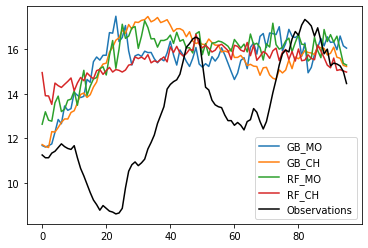

In [620]:
for model_name in ['GB_MO','GB_CH','RF_MO','RF_CH']:#,'LR_MO','LR_RC']:
    estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
    # estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/Mean_'+model_name+'.mdl')
    scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
    scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')
    # scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/Mean_X.scl')
    # scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/Mean_Y.scl')
    x_scaled = scaler_x.transform(x_temp.reshape(1, -1))
    prediction_temp = estimator_temp.predict(x_scaled)
    prediction = scaler_y.inverse_transform(prediction_temp)

    plt.plot(pd.DataFrame(prediction[0]).rolling(1,min_periods=1).mean(),label = model_name)
plt.plot(pd.DataFrame(y_temp).rolling(1,min_periods=1).mean(),label='Observations',color='k')
plt.legend()

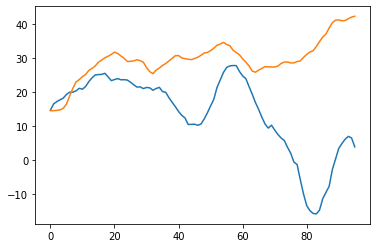

In [598]:
## con radiacion, nubes y precipitacion Y HPBL y cin
plt.plot(pd.DataFrame(prediction[0]).rolling(1,min_periods=1).mean())
plt.plot(pd.DataFrame(y_temp).rolling(1,min_periods=1).mean())

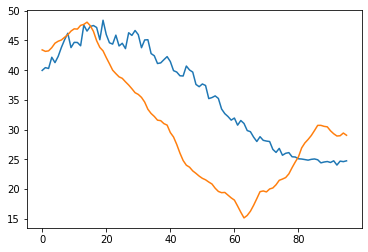

In [543]:
## con radiacion, nubes y precipitacion Y HPBL y cin
plt.plot(pd.DataFrame(prediction[0]).rolling(1,min_periods=1).mean())
plt.plot(pd.DataFrame(y_temp).rolling(1,min_periods=1).mean())

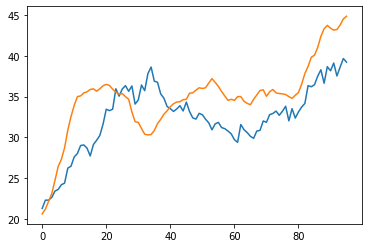

In [409]:
## con radiacion, nubes y precipitacion Y HPBL (coronamos, se acaba un camino largo jeje suuuu)
plt.plot(pd.DataFrame(prediction[0]).rolling(1,min_periods=1).mean())
plt.plot(pd.DataFrame(y_temp).rolling(1,min_periods=1).mean())

In [429]:
forecast_initial_date = dates_start_forecast[1820]

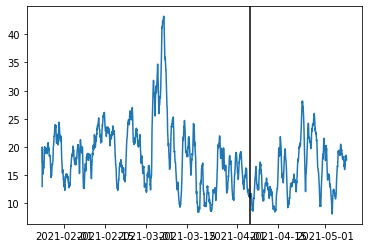

In [621]:
plt.plot(df_pm2p5_full.rolling('24H').mean())
plt.axvline(forecast_initial_date,color='k')

In [265]:
forecast_initial_date

Timestamp('2021-03-01 02:00:00', freq='H')

In [215]:
estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')

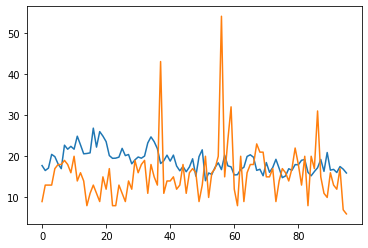

In [217]:
plt.plot(prediction[0])
plt.plot(pm_validation_temp.values)

In [12]:
aaa
for i in range(len(dates_start_forecast)):
    if i%100==0:
        print(i)
    df_GFS,df_optimal_gfs = get_gfs_for_forecast(dates_start_forecast[i],gfs_path,operational = False,latlon = (lat_est,lon_est))
    df_CAMS,df_optimal_cams = get_cams_for_forecast(dates_start_forecast[i],cams_path,operational = False,latlon = (lat_est,lon_est))
    # get_cams_for_forecast(dt.datetime(2022,1,9,16),cams_path,True)

    pm_validation_temp = df_pm2p5_full[dates_start_forecast[i]+dt.timedelta(hours = 1):dates_start_forecast[i]+\
                                                      dt.timedelta(hours = 96)]

    ########################### ORGANIZE initial X ####################
    forecast_initial_date = dates_start_forecast[i]
    ### Dataframe with lagged data
    max_lag = 24 ## Maximum lag used
    ## starts in zero because in the training section I add the lead_time
    x_shifts = pd.concat([df_pm2p5_full['PM2.5'].shift(i) for i in range(max_lag,0,-1)],axis = 1).dropna()
    x_shifts.columns = (-np.arange(max_lag,0,-1)).astype(str)


    #CAMS
    x_cams = df_optimal_cams[['pm2p5_cams','aod','ssaod','omaod','duaod','bcaod']].loc\
        [forecast_initial_date+dt.timedelta(hours = 1):\
        forecast_initial_date+dt.timedelta(hours = 96)].values
    #GFS
    x_gfs = df_optimal_gfs[['tcc','rad','prate','hpbl','cin']].loc\
        [forecast_initial_date+dt.timedelta(hours = 1):\
        forecast_initial_date+dt.timedelta(hours = 96)].values

NameError: name 'aaa' is not defined